# Crab Age Study

This notebook shows the EDA, PCA and model training done on an ANN-MLP model to determine/predict the age of the crab.

## Initial Data Extraction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
#for PCA and ANN model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

#to extract the data from kaggle
import os

for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#check imported data
crab_train = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')
crab_test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')

In [3]:
crab_train.head(10)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
5,5,M,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,10
6,6,M,1.5750,1.1375,0.3500,30.022120,11.935140,7.342521,8.646598,11
7,7,I,1.3125,1.0250,0.3500,18.299602,8.249704,3.898056,5.669900,11
8,8,F,1.6000,1.2875,0.4375,38.824640,16.967176,7.413394,10.772810,12
9,9,M,1.0250,0.7625,0.2625,10.305043,4.493396,2.126212,2.976698,11


In [4]:
crab_test.head(10)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066
5,74056,M,1.4250,1.1125,0.3500,24.834162,8.731646,5.712424,8.079607
6,74057,M,1.7125,1.3250,0.4500,46.677452,21.233776,11.963489,11.368149
7,74058,I,1.1750,0.8875,0.3000,13.933779,5.698250,2.990872,3.940580
8,74059,F,1.3125,1.0625,0.2875,23.586784,8.164656,5.627376,8.462326
9,74060,F,1.4250,1.0500,0.3125,17.789311,7.101550,4.606794,5.528153


In [5]:
crab_train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


There are 74051 datasets used for training. There appears to be height 0 crabs present in the dataset.

In [6]:
crab_test.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,98734.500000,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876
std,14251.458382,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650
min,74051.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524
25%,86392.750000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930
50%,98734.500000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627
75%,111076.250000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063
max,123418.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248


There are 49368 datasets used in testing but we will be focusing on the training dataset. Similarly, there are height 0 crabs present in the test set.

In [7]:
#Looking at sex of the crabs, there needs to be some form of encoding done here.
#We will be using the labelencoder from sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
crab_train['Sex'] = le.fit_transform(crab_train.Sex.values)

#The same goes for the crab test set too
crab_test['Sex'] = le.fit_transform(crab_test.Sex.values)

In [8]:
crab_train.describe()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.055016,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.820647,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,0.000000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,2.000000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [9]:
crab_test.describe()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,98734.500000,1.049445,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876
std,14251.458382,0.821110,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650
min,74051.000000,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524
25%,86392.750000,0.000000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930
50%,98734.500000,1.000000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627
75%,111076.250000,2.000000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063
max,123418.000000,2.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248


# EDA of the crab dataset

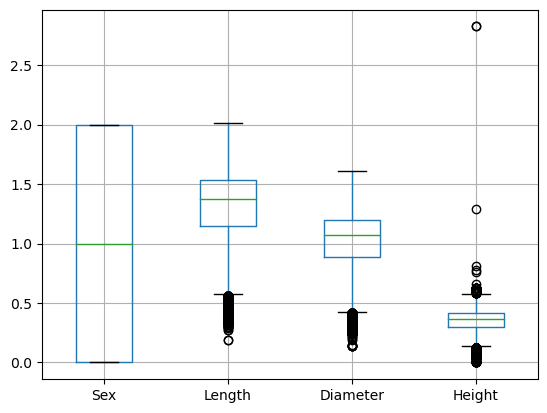

In [10]:
#Starting EDA

#removing id from trainset
training_crab = pd.DataFrame(crab_train, columns = ['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight'])

#Taking a look at the boxplot
df_crab = pd.DataFrame(crab_train, columns = ['Sex', 'Length', 'Diameter', 'Height'])
df_crab.boxplot()
plt.show()

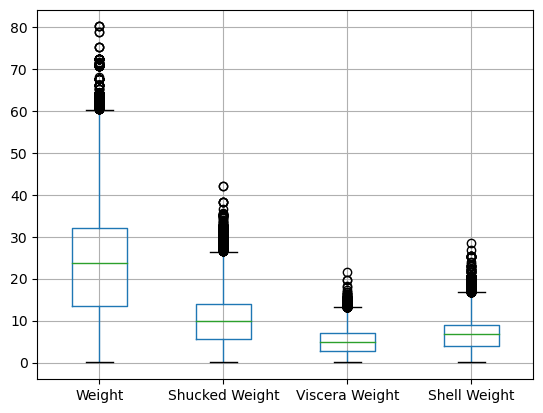

In [11]:
df_crab2 = pd.DataFrame(crab_train, columns = ['Weight','Shucked Weight', 'Viscera Weight', 'Shell Weight'])
df_crab2.boxplot()
plt.show()

There are quite a number of outliers but we decided not to remove them as they are quite the number which might affect the accuracy of the model.

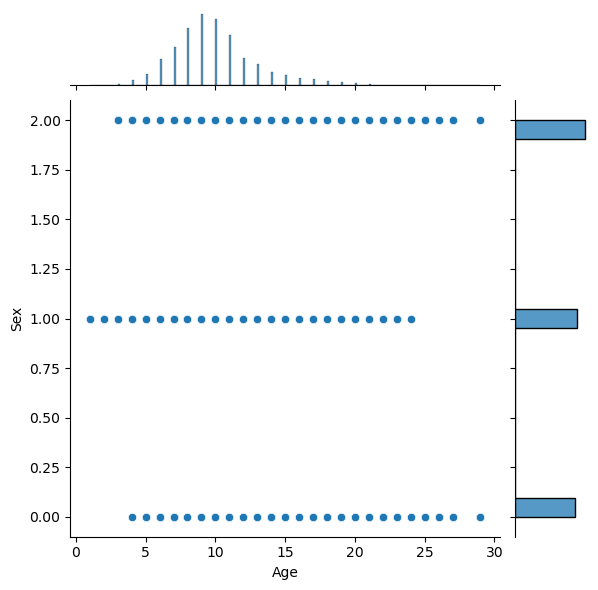

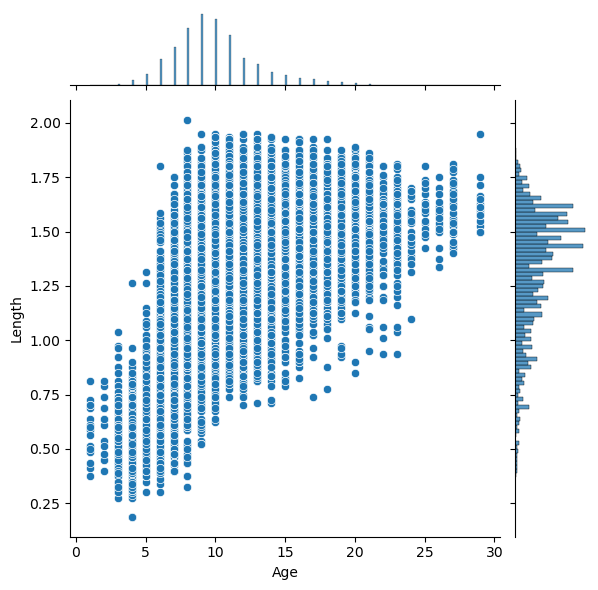

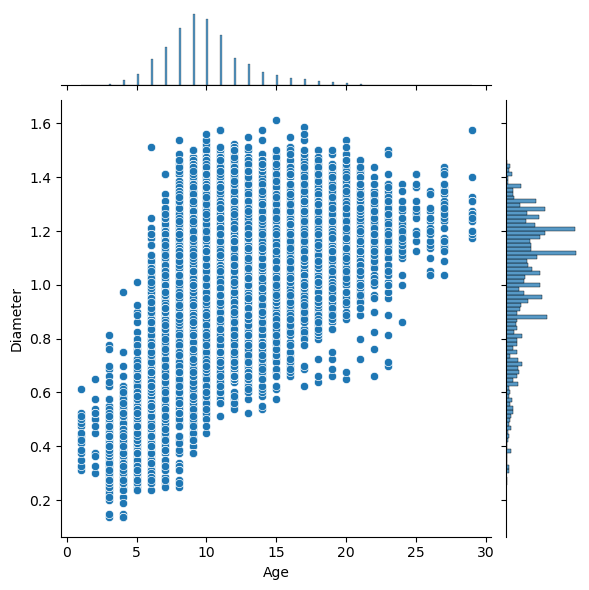

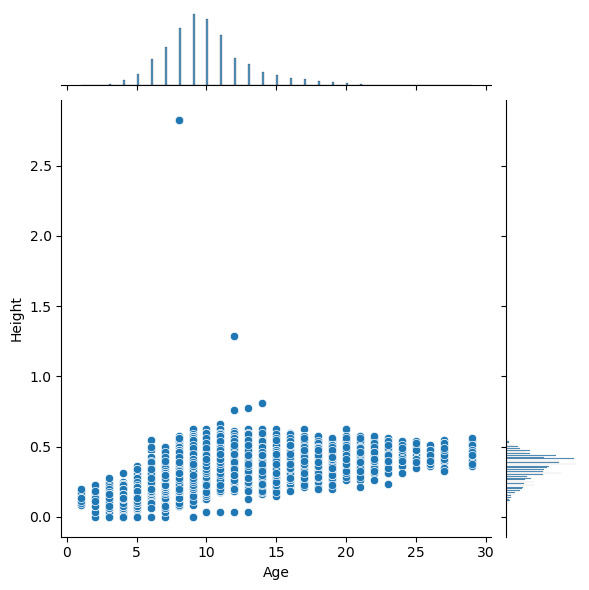

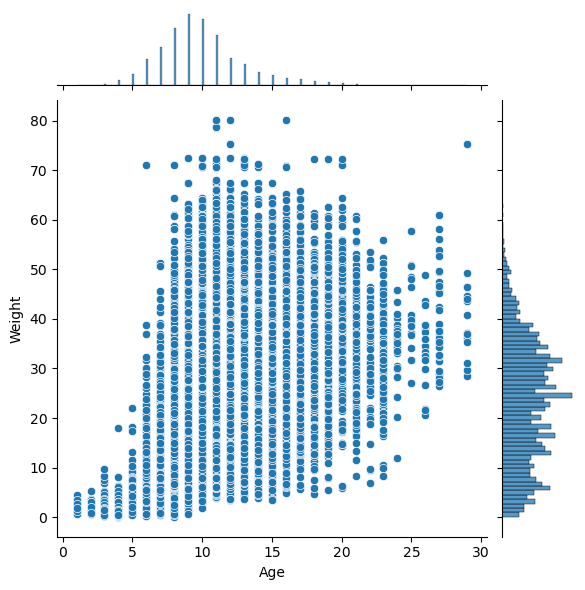

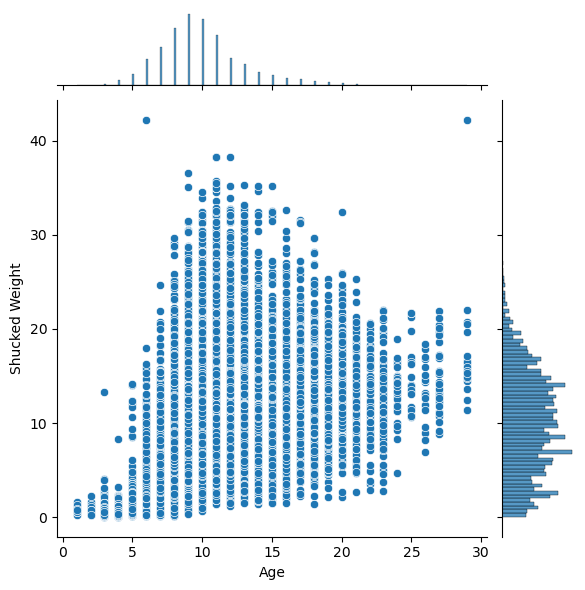

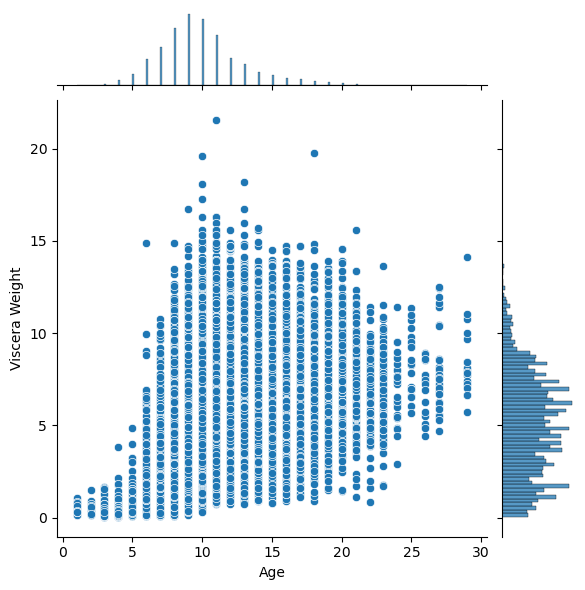

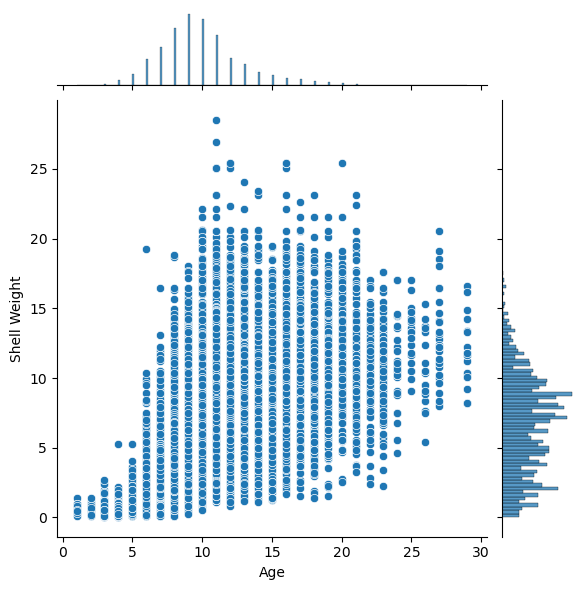

In [12]:
#We will plot out the scatterplots for each dataset comparing to age
sb.jointplot(data = crab_train, x = 'Age', y = 'Sex')
sb.jointplot(data = crab_train, x = 'Age', y = 'Length')
sb.jointplot(data = crab_train, x = 'Age', y = 'Diameter')
sb.jointplot(data = crab_train, x = 'Age', y = 'Height')
sb.jointplot(data = crab_train, x = 'Age', y = 'Weight')
sb.jointplot(data = crab_train, x = 'Age', y = 'Shucked Weight')
sb.jointplot(data = crab_train, x = 'Age', y = 'Viscera Weight')
sb.jointplot(data = crab_train, x = 'Age', y = 'Shell Weight')

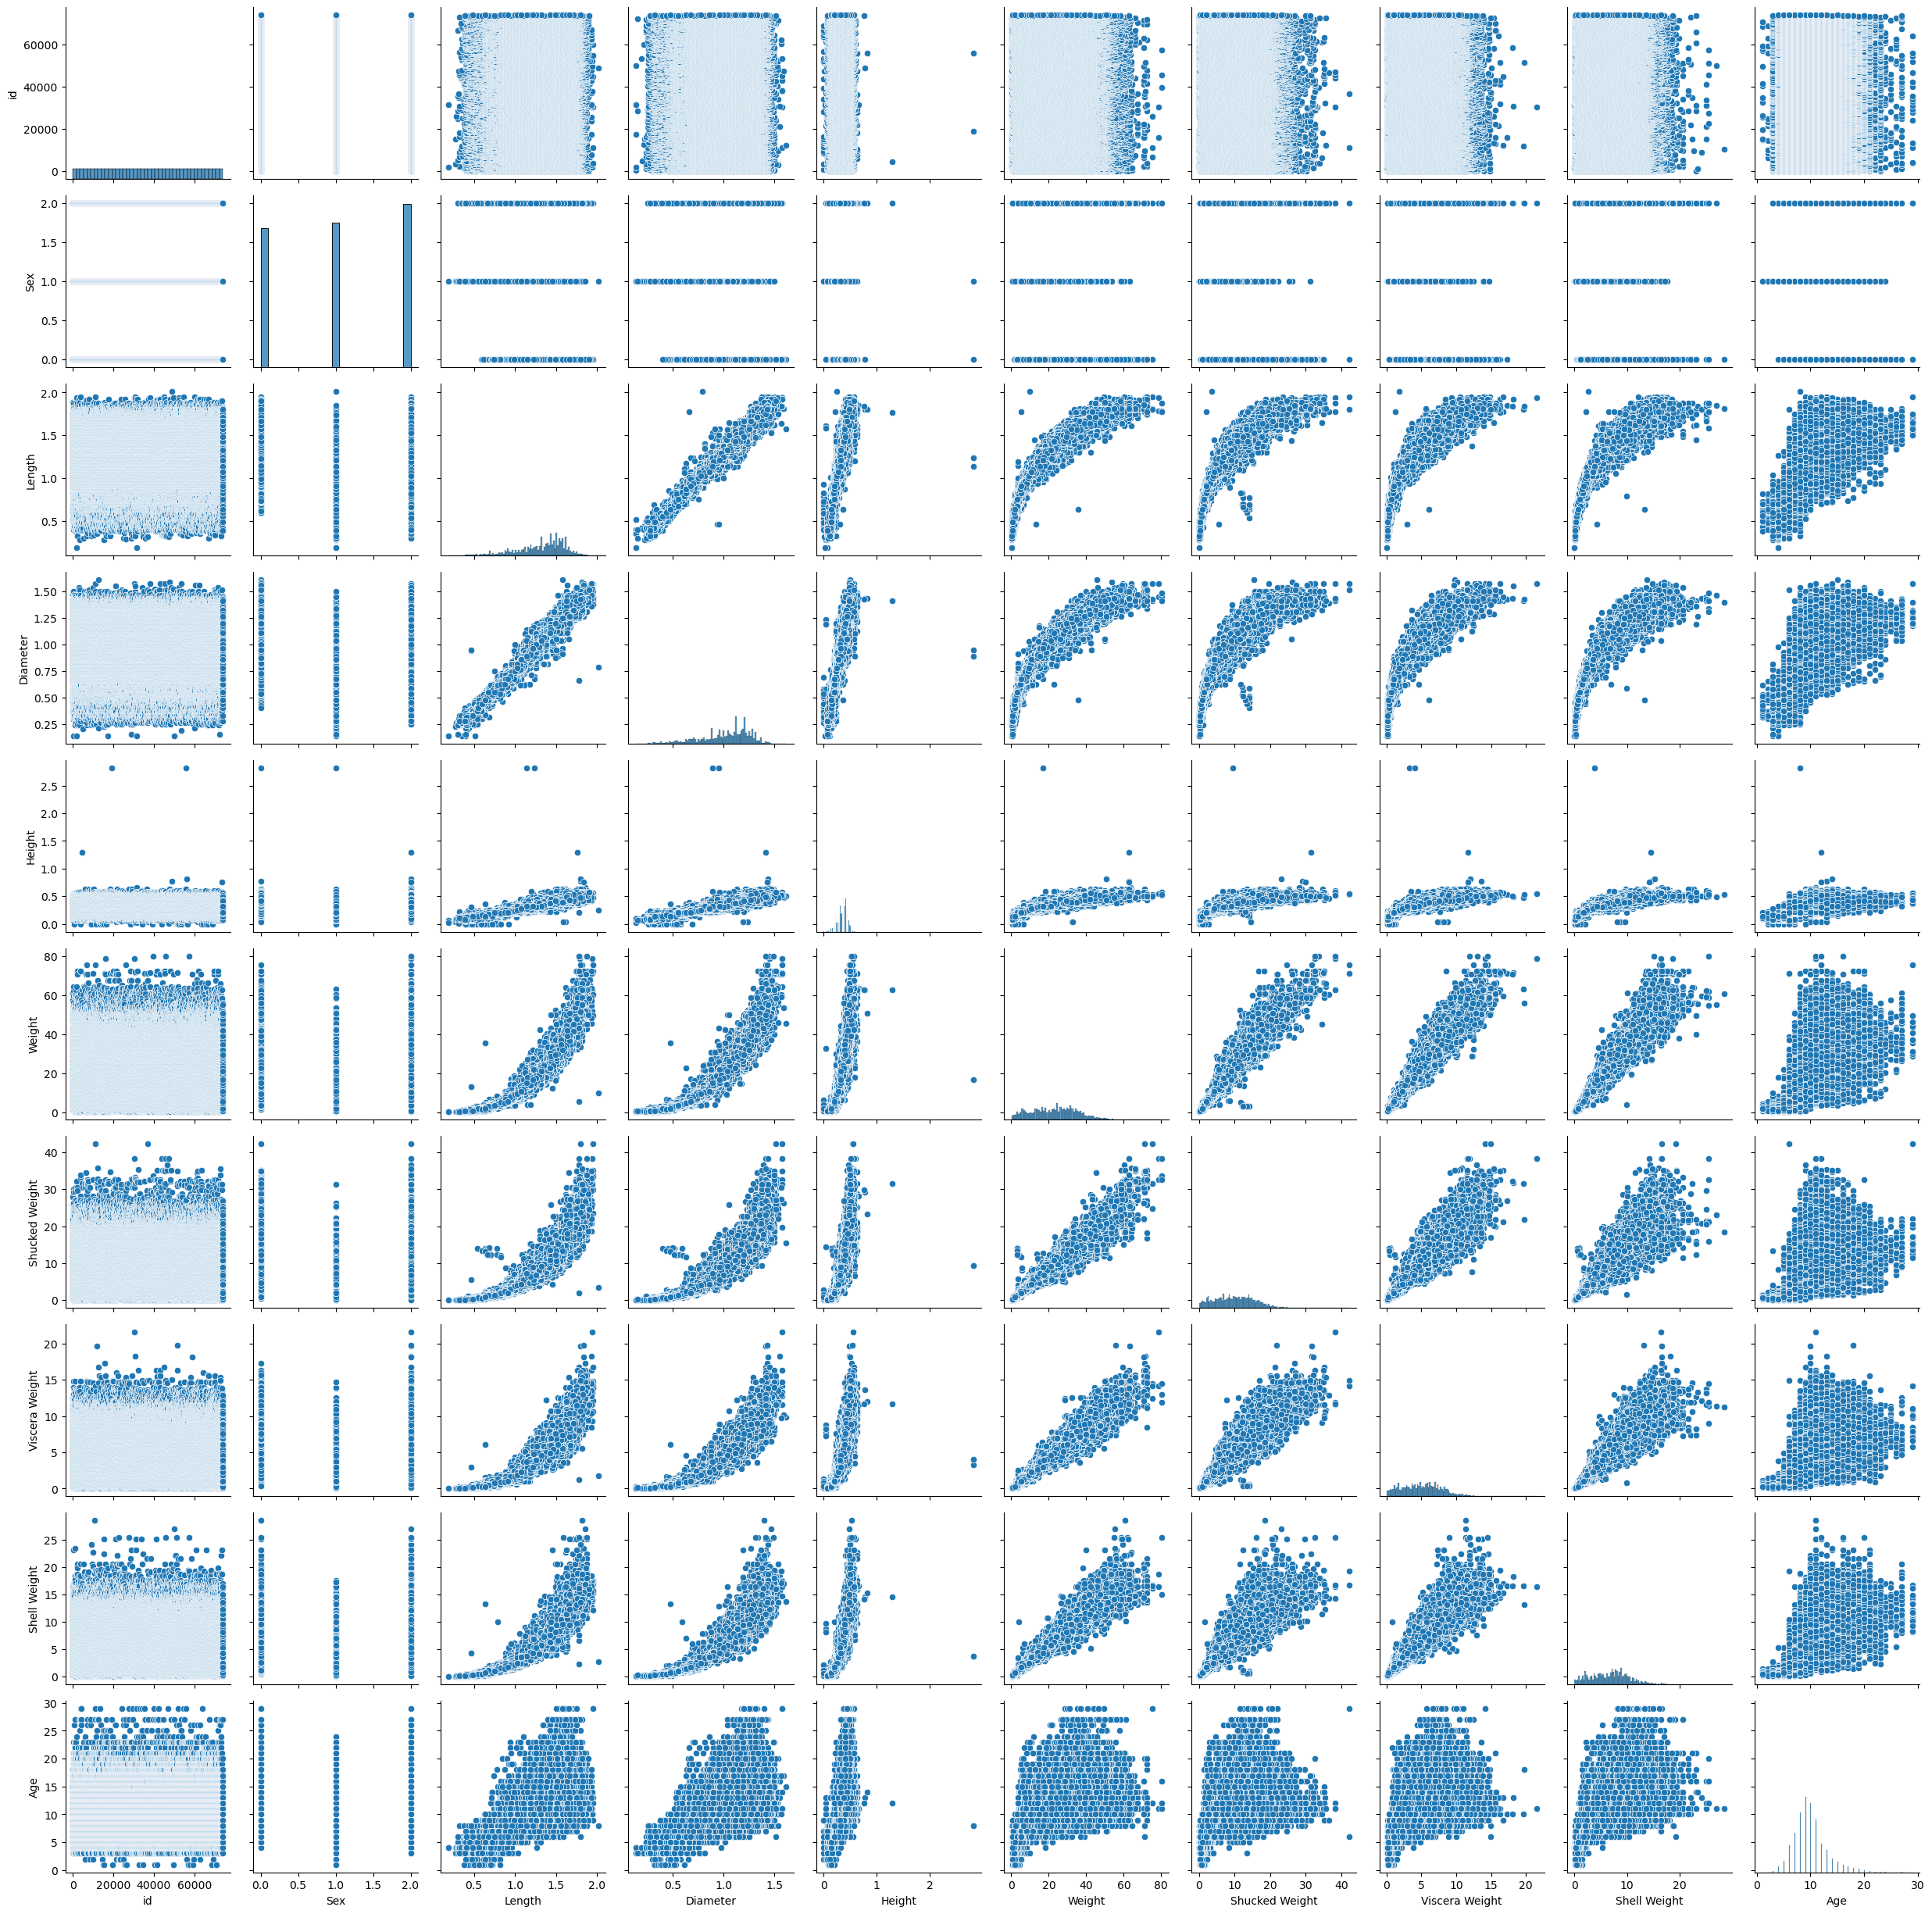

In [13]:
joints = sb.PairGrid(crab_train)
joints.map_diag(sb.histplot)
joints.map_offdiag(sb.scatterplot)

It does not seem too clear of a relationship between each variable and age. Hence, we will see the correlation of each variable with age.

In [14]:
#Correlation of data
crab_train.corr(method = 'pearson')

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,1.000000,-0.002489,0.000165,0.000290,0.000967,-0.000910,-0.000801,-0.000640,-0.000816,0.000089
Sex,-0.002489,1.000000,-0.017546,-0.018933,-0.022480,-0.024429,-0.013444,-0.027389,-0.029583,-0.033541
Length,0.000165,-0.017546,1.000000,0.989437,0.918352,0.936374,0.915516,0.917855,0.916957,0.612843
Diameter,0.000290,-0.018933,0.989437,1.000000,0.921353,0.938249,0.914199,0.918351,0.922688,0.621256
Height,0.000967,-0.022480,0.918352,0.921353,1.000000,0.901775,0.864083,0.883127,0.903398,0.638067
Weight,-0.000910,-0.024429,0.936374,0.938249,0.901775,1.000000,0.971267,0.971062,0.965525,0.601195
Shucked Weight,-0.000801,-0.013444,0.915516,0.914199,0.864083,0.971267,1.000000,0.942626,0.910398,0.503320
Viscera Weight,-0.000640,-0.027389,0.917855,0.918351,0.883127,0.971062,0.942626,1.000000,0.933919,0.576808
Shell Weight,-0.000816,-0.029583,0.916957,0.922688,0.903398,0.965525,0.910398,0.933919,1.000000,0.663473
Age,0.000089,-0.033541,0.612843,0.621256,0.638067,0.601195,0.503320,0.576808,0.663473,1.000000


We can see that the age of the crab has a high correlation with the Shell Weight, Viscera Weight, Height, Diameter and Length of the crab. (Considering that its above 0.6). However, let's run a PCA to further determine a model better for ANN-MLP.

# PCA 

In [15]:
#Delete ID number from crab_train
crab_train_pca = crab_train.drop('id',axis=1)
crab_train_pca.head(10)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
5,2,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,10
6,2,1.5750,1.1375,0.3500,30.022120,11.935140,7.342521,8.646598,11
7,1,1.3125,1.0250,0.3500,18.299602,8.249704,3.898056,5.669900,11
8,0,1.6000,1.2875,0.4375,38.824640,16.967176,7.413394,10.772810,12
9,2,1.0250,0.7625,0.2625,10.305043,4.493396,2.126212,2.976698,11


In [16]:
#Standardization of crab_train
scaler = StandardScaler()
crab_train_scaled = scaler.fit_transform(crab_train_pca)
print(crab_train_scaled)

[[-0.06704038  0.72123811  0.63398203 ...  0.56918615  0.45337609
  -0.30480467]
 [-0.06704038 -0.75571183 -0.84035601 ... -0.97887971 -0.92678786
  -0.61974866]
 [ 1.15151808  0.24340136  0.37070738 ...  0.17836296 -0.01722423
  -0.30480467]
 ...
 [-1.28559884  0.590919    0.73929189 ...  0.88895057  0.37823822
   0.01013932]
 [-0.06704038 -0.36475449 -0.26115178 ... -0.76570342 -0.68160114
  -0.61974866]
 [-0.06704038 -1.40730739 -1.47221517 ... -1.44076165 -1.4013428
  -1.24963664]]


In [17]:
#Making a model
pca = PCA()
pca.fit(crab_train_scaled)

#Calculating principal component score
values = pca.transform(crab_train_scaled)
print(values)

[[ 1.23143696  0.02215664 -0.63977752 ...  0.13173828  0.05789762
  -0.0280557 ]
 [-2.46537709  0.09448524  0.05283338 ...  0.01775156  0.06108766
  -0.02335759]
 [ 0.41824692 -1.17761356 -0.36530339 ...  0.05461176 -0.10031957
  -0.01783327]
 ...
 [ 1.53916018  1.25078191 -0.42524596 ...  0.40833709 -0.11221695
  -0.02856414]
 [-1.32362322  0.06001142 -0.31556498 ... -0.30817853 -0.08478665
  -0.01694169]
 [-4.03940165  0.10069087 -0.23087564 ...  0.00539715  0.04103581
   0.03695359]]


In [18]:
#Convert values to dataframe type

df_pca = pd.DataFrame(data = values,
                     columns = ["Principle component{}".format(x+1) for x in range(len(crab_train_pca.columns))])
df_pca.head(10)

,Principle component1,Principle component2,Principle component3,Principle component4,Principle component5,Principle component6,Principle component7,Principle component8,Principle component9
0,1.231437,0.022157,-0.639778,0.146800,-0.231027,-0.159162,0.131738,0.057898,-0.028056
1,-2.465377,0.094485,0.052833,0.233059,-0.036508,-0.046036,0.017752,0.061088,-0.023358
2,0.418247,-1.177614,-0.365303,0.273345,-0.032805,0.096695,0.054612,-0.100320,-0.017833
3,4.857757,1.197378,-0.996749,-0.523269,0.471099,-0.418023,0.083379,-0.196463,0.038297
4,-0.338555,0.038543,-0.628250,-0.064715,-0.005642,0.200294,-0.283736,-0.137903,-0.032142
5,1.429290,-1.185569,-0.313320,0.248528,0.028039,0.157958,0.114292,-0.004815,-0.067524
6,1.390143,-1.166474,-0.012934,-0.184031,-0.437220,-0.224182,0.380445,0.288983,0.033251
7,-0.441271,0.091262,0.506027,0.402118,-0.093899,0.060364,-0.063243,-0.009537,-0.057305
8,2.909878,1.245218,-0.191706,-0.068823,-0.036097,-0.021499,-0.304929,-0.091204,0.068588
9,-2.551266,-1.076473,1.035359,-0.141091,-0.038331,0.204777,-0.054143,0.061660,0.000545


In [19]:
#Calculate contribution
ev_ratio = pca.explained_variance_ratio_
print(ev_ratio)

[0.77614656 0.11114995 0.06751988 0.01874653 0.01146989 0.00701291
 0.00575122 0.00115257 0.0010505 ]


In [20]:
#Convert ev_ratio to dataframe type
df_evr = pd.DataFrame(data = ev_ratio,
                     columns = ["Contribution"],
                     index = ["Principle component{}".format(x+1) for x in range(len(crab_train_pca.columns))])
print(df_evr)

                      Contribution
Principle component1      0.776147
Principle component2      0.111150
Principle component3      0.067520
Principle component4      0.018747
Principle component5      0.011470
Principle component6      0.007013
Principle component7      0.005751
Principle component8      0.001153
Principle component9      0.001050


In [21]:
#Calculate the cumulative contribution
cc_ratio = np.cumsum(ev_ratio)
cc_ratio = np.hstack([0, cc_ratio])
print(cc_ratio)

[0.         0.77614656 0.8872965  0.95481638 0.97356291 0.9850328
 0.99204571 0.99779693 0.9989495  1.        ]


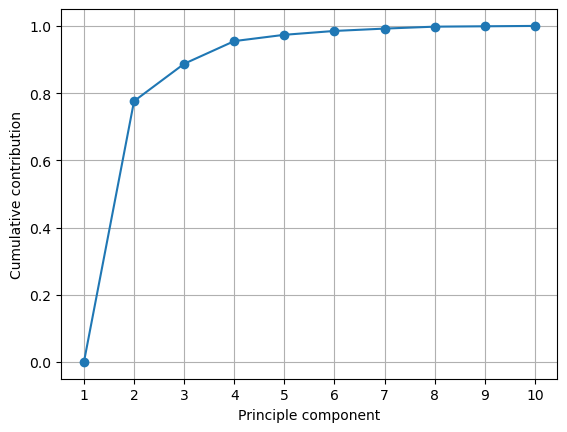

In [22]:
#Making a graph for cumulative contribution
plt.plot(cc_ratio, "-o")
plt.xlabel("Principle component")
plt.ylabel("Cumulative contribution")
plt.grid()
plt.xticks(range(len(cc_ratio)), range(1, len(cc_ratio) + 1))
plt.show()

In [23]:
#100% ÷ 9 columns = 1.11
#Principles with less than 1.11 contribution rate cannot be said to concentrate information. So they are not important.

# ANN-MLP Model

In [24]:
#for Multiple Layer Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [25]:
#Multiple Layer Perstron
random = 0

#Dividing data
x_train, x_test, y_train, y_test = train_test_split(df_pca[['Principle component1', 'Principle component2']], crab_train['Age'], test_size = 0.3, random_state = random)

print("x_train")
print(x_train.head())

x_train
       Principle component1  Principle component2
8276              -1.122355             -1.152220
4334               1.165664             -1.198849
61933              2.823238              1.380262
9939               4.839852              1.242866
42015              0.741230              1.378013


In [26]:
print("x_test")
print(x_test.head())

x_test
       Principle component1  Principle component2
67937             -6.022707             -1.078546
8479               1.614886             -1.135689
31750             -1.423531              0.068208
73945              1.745922              1.291153
52917              0.174850             -1.147737


In [27]:
print("y_train")
print(y_train.head())

y_train
8276      8
4334      9
61933    20
9939     14
42015    17
Name: Age, dtype: int64


In [28]:
print("y_test")
print(y_test.head())

y_test
67937     5
8479     13
31750     8
73945    13
52917    11
Name: Age, dtype: int64


In [29]:
#Making a model to calculating Mean Squared Error to validify the training model
clf = MLPRegressor()
clf.fit(x_train, y_train)

predicted = clf.predict(x_test)

print(predicted)

[ 5.11762404 13.34404841  8.12082869 ...  9.68257572  5.97413786
  6.91296822]


In [30]:
mse = mean_squared_error(y_test, predicted)
print(mse)

0.11912781812734605


## Training against test model

In [31]:
#same steps as before but for test
crab_test_pca = crab_test.drop('id',axis=1)
crab_test_pca.head(10)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066
5,2,1.4250,1.1125,0.3500,24.834162,8.731646,5.712424,8.079607
6,2,1.7125,1.3250,0.4500,46.677452,21.233776,11.963489,11.368149
7,1,1.1750,0.8875,0.3000,13.933779,5.698250,2.990872,3.940580
8,0,1.3125,1.0625,0.2875,23.586784,8.164656,5.627376,8.462326
9,0,1.4250,1.0500,0.3125,17.789311,7.101550,4.606794,5.528153


In [32]:
#Standardization of crab_test
scaler = StandardScaler()
crab_test_scaled = scaler.fit_transform(crab_test_pca)
print(crab_test_scaled)

[[-0.06021785 -0.94022724 -1.1152488  ... -1.15350235 -1.19765493
  -1.1254916 ]
 [-0.06021785 -0.5481686  -0.58690972 ... -0.55233383 -0.65433444
  -0.7766346 ]
 [-1.27809371 -0.11254788 -0.16423845 ... -0.81502932 -0.42583517
  -0.53877755]
 ...
 [-1.27809371  0.58444527  0.57543626 ...  0.22564896  0.635417
   0.571222  ]
 [-1.27809371 -0.28679617 -0.32274018 ... -0.71904443 -0.48169055
  -0.49913471]
 [ 1.15765801  1.19431427  1.15660925 ...  0.85207666  1.15334868
   1.04693609]]


In [33]:
#Making a model
pca_test = PCA()
pca_test.fit(crab_test_scaled)

#Calculating principal component score
values_test = pca_test.transform(crab_test_scaled)
print(values_test)

[[-2.83901587e+00  9.52824524e-02  2.93658669e-01 ...  3.70817096e-02
  -1.00437180e-01 -7.04868108e-02]
 [-1.71540668e+00  7.74608978e-02 -8.70631089e-02 ...  4.88274218e-03
   4.59222111e-03 -3.91267833e-02]
 [-1.12609189e+00  1.29287284e+00  5.42714189e-01 ... -2.65060556e-01
  -5.78245374e-02  2.45228780e-02]
 ...
 [ 1.29422253e+00  1.26336423e+00 -1.32025311e-01 ... -2.16406119e-01
   7.02451516e-02 -1.31293271e-01]
 [-1.33866646e+00  1.29351342e+00  1.36037721e-01 ... -1.49906955e-01
  -3.01737187e-02 -1.00517077e-03]
 [ 2.78675218e+00 -1.19045160e+00  1.00667814e-01 ... -2.00309438e-01
  -1.00280981e-02 -3.66999423e-02]]


In [34]:
#Convert values to dataframe type

df_pca_test = pd.DataFrame(data = values_test,
                     columns = ["Principle component{}".format(x+1) for x in range(len(crab_test_pca.columns))])
df_pca_test.head(10)

,Principle component1,Principle component2,Principle component3,Principle component4,Principle component5,Principle component6,Principle component7,Principle component8
0,-2.839016,0.095282,0.293659,0.046073,0.080550,0.037082,-0.100437,-0.070487
1,-1.715407,0.077461,-0.087063,-0.245608,0.033407,0.004883,0.004592,-0.039127
2,-1.126092,1.292873,0.542714,-0.213272,-0.126678,-0.265061,-0.057825,0.024523
3,1.010007,1.263199,-0.123705,-0.100417,0.398785,-0.096166,-0.559891,-0.361513
4,-2.279509,0.084668,0.055549,-0.243315,-0.006826,0.029998,-0.012610,0.003590
5,0.445023,-1.160150,0.194811,-0.083371,-0.479175,-0.231809,-0.001358,-0.025252
6,4.263757,-1.210144,-0.969548,-0.033982,0.373027,-0.578831,-0.064161,0.001223
7,-1.774201,0.081234,0.270338,-0.102443,0.028941,-0.045836,-0.025509,-0.059347
8,-0.050651,1.281564,-0.338422,-0.129601,-0.808316,-0.216147,0.053837,0.104207
9,-0.518544,1.281476,0.374948,-0.562478,-0.278128,-0.296610,-0.177664,-0.059574


In [35]:
#Calculate contribution
ev_ratio_test = pca_test.explained_variance_ratio_
print(ev_ratio_test)

[0.81891055 0.12492487 0.02341978 0.01398375 0.00970726 0.0065003
 0.00129591 0.00125758]


In [36]:
#Convert ev_ratio to dataframe type
df_evr_test = pd.DataFrame(data = ev_ratio_test,
                     columns = ["Contribution"],
                     index = ["Principle component{}".format(x+1) for x in range(len(crab_test_pca.columns))])
print(df_evr_test)

                      Contribution
Principle component1      0.818911
Principle component2      0.124925
Principle component3      0.023420
Principle component4      0.013984
Principle component5      0.009707
Principle component6      0.006500
Principle component7      0.001296
Principle component8      0.001258


In [37]:
#Calculate the cumulative contribution
cc_ratio_test = np.cumsum(ev_ratio_test)
cc_ratio_test = np.hstack([0, cc_ratio_test])
print(cc_ratio_test)

[0.         0.81891055 0.94383542 0.9672552  0.98123895 0.99094621
 0.99744651 0.99874242 1.        ]


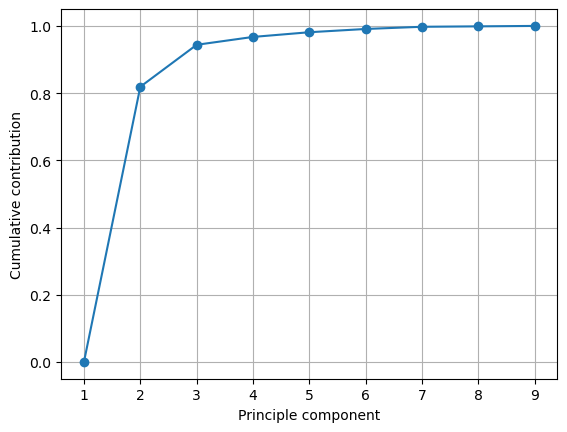

In [38]:
#Making a graph for cumulative contribution
plt.plot(cc_ratio_test, "-o")
plt.xlabel("Principle component")
plt.ylabel("Cumulative contribution")
plt.grid()
plt.xticks(range(len(cc_ratio_test)), range(1, len(cc_ratio_test) + 1))
plt.show()

In [39]:
test_set = df_pca_test[['Principle component1', 'Principle component2']]

In [40]:
predicted_age = clf.predict(test_set)
print(predicted_age)

[ 7.59637097  8.20920094  8.87286295 ... 10.54404493  8.62081231
 11.64779994]


In [41]:
#check size
len(predicted_age)

49368

In [42]:
#creating index column for test data
submission_id = crab_test["id"]
submission_id = submission_id.reset_index(drop=True)

In [43]:
submission_id

0         74051
1         74052
2         74053
3         74054
4         74055
          ...  
49363    123414
49364    123415
49365    123416
49366    123417
49367    123418
Name: id, Length: 49368, dtype: int64

In [44]:
pred_age = pd.Series(predicted_age)
pd.set_option("display.precision", 0)
pred_age 

0         8
1         8
2         9
3        10
4         8
         ..
49363     9
49364     8
49365    11
49366     9
49367    12
Length: 49368, dtype: float64

In [45]:
submission_data = pd.concat([submission_id, pred_age], join = 'outer', axis = 1)
submission_data = submission_data.rename(columns = {submission_data.columns[1]: "Age"})
submission_data

,id,Age
0,74051,8
1,74052,8
2,74053,9
3,74054,10
4,74055,8
...,...,...
49363,123414,9
49364,123415,8
49365,123416,11
49366,123417,9


In [46]:
#extract submission dataframe
submission = submission_data.to_csv('submission_data.csv', index = False)